# Query submitted data from GlaMBIE submission system

Demo on how to use the glambie code to query and show data from the submission system

In [1]:
import matplotlib.pyplot as plt
from glambie.data.data_catalogue import DataCatalogue
from glambie.plot.plot_helpers import get_colours, add_labels_axlines_and_title
from glambie.plot.plot_helpers import plot_non_cumulative_timeseries_on_axis, plot_cumulative_timeseries_on_axis
from glambie.data import submission_system_interface

#### Query and filter data

In [2]:
# read catalogue - this might take a while to download data from the submission system
catalogue_original = DataCatalogue.from_glambie_submission_system()

In [3]:
# filter catalogue by region: we'll just query datasets over alaska
catalogue_filtered = catalogue_original.get_filtered_catalogue(region_name="alaska")

In [4]:
# Let's print all datasets in Alaska
for d in catalogue_filtered.datasets:
    print(f"{d.region.name} \t {d.data_group.name} \t {d.user_group}")

alaska 	 combined 	 ArcticInSituvGRACE
alaska 	 demdiff 	 ETH
alaska 	 combined 	 Huss
alaska 	 gravimetry 	 Wouters
alaska 	 combined 	 Huss_monthly
alaska 	 gravimetry 	 Harig_Group
alaska 	 altimetry 	 Jakob_Gourmelen
alaska 	 glaciological 	 WGMS-mean_ba
alaska 	 gravimetry 	 Velicogna
alaska 	 combined 	 Box2018
alaska 	 gravimetry 	 Jacob_2012_dmdt
alaska 	 gravimetry 	 Sasgen_AWIarc_RL01_2
alaska 	 glaciological 	 UZH_GlaciolSineWave
alaska 	 combined 	 DUS-combined
alaska 	 glaciological 	 WGMS-beta


### Plot all datasets from one group 

Now we will filter by region (Iceland) and data group (DEM DIfferencing) and plot all the datasets in one plot

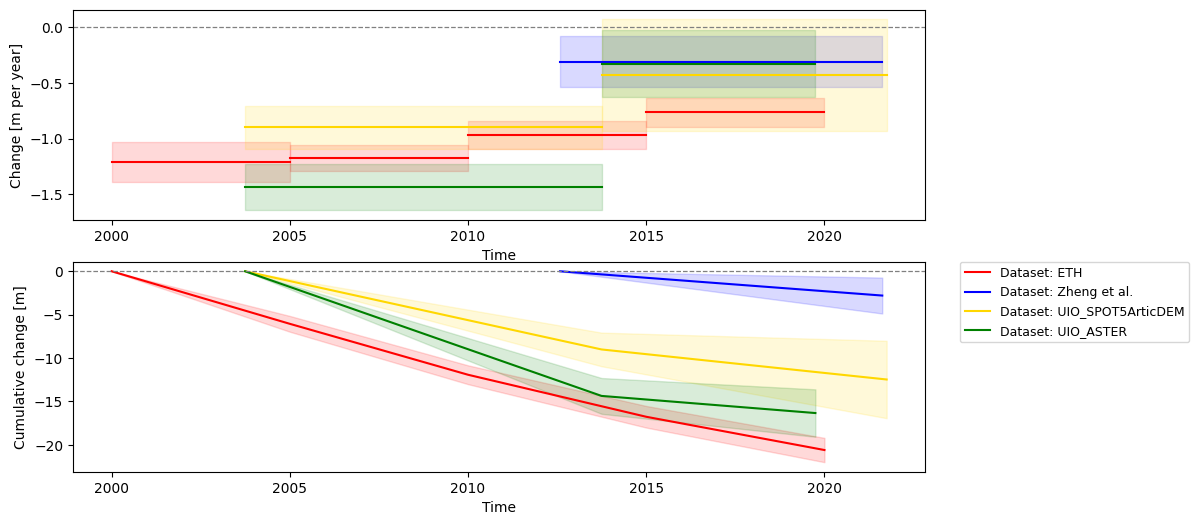

In [5]:
# filter catalogue by region and datagroup
catalogue_filtered_group = catalogue_original.get_filtered_catalogue(region_name="iceland", data_group="demdiff")
plot_errors=True # set to True if you want to plot error bars

_, axes = plt.subplots(2, 1, figsize=(11, 6))
colours = get_colours(len(catalogue_filtered_group.datasets)+1)
# plot non-cumulative timeseries
for count, ds in enumerate(catalogue_filtered_group.datasets):
    plot_non_cumulative_timeseries_on_axis(
        result_dataframe=ds.data.as_dataframe(), ax=axes[0], colour=colours[count], plot_errors=plot_errors)

# plot cumulative timeseries
for count, ds in enumerate(catalogue_filtered_group.datasets):
    plot_cumulative_timeseries_on_axis(
        timeseries=ds, ax=axes[1], colour=colours[count], plot_errors=plot_errors, linestyle="-",
        timeseries_for_vertical_adjustment=None, # you can set this to a particular reference timeseries if you don't want the cumulative timeseries starting at 0 for each dataset
        label="Dataset: " + ds.user_group)

add_labels_axlines_and_title(
    axes=axes, unit=catalogue_filtered_group.datasets[0].unit, legend_fontsize=9,
    title="")

### Pick one dataset and look at it

We'll now pick out one dataset and look at it's data and metadata and perform some simple operations

In [6]:
# pick a dataset to look at
dataset = catalogue_filtered.datasets[9]
# print some metadata
print(f"region = {dataset.region.name} \t data_group/source = {dataset.data_group.name} \t author group = {dataset.user_group}  \t unit = {dataset.unit}  \t RGI version = {dataset.rgi_version}" )
# show first few rows of data of that dataset
dataset.data.as_dataframe().head()

region = alaska 	 data_group/source = combined 	 author group = Box2018  	 unit = Gt  	 RGI version = 6.0


,start_dates,end_dates,changes,errors,glacier_area_reference,glacier_area_observed,hydrological_correction_value,remarks
0,2002.747945,2003.747945,-58.51,69.30,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
1,2003.747945,2004.748634,-162.52,31.91,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
2,2004.748634,2005.747945,-101.63,27.47,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
3,2005.747945,2006.747945,-36.55,31.66,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
4,2006.747945,2007.747945,-36.76,21.11,86725,86725,None,"only grace period 2003-2015, update to Box et ..."


In [7]:
# Show some more metadata...
# The metadata comes as a dictionnary, here are the keys:
print(dataset.additional_metadata.keys())
# for example let's pick one key show co-authors
print("Co-Authors: ",dataset.additional_metadata["co_author_names"])

dict_keys(['filename', 'data_group', 'unit', 'lead_author_email', 'co_author_names', 'co_author_emails', 'sponsoring_agency', 'dataset_references', 'is_combined_grace_used', 'is_combined_insitu_used', 'is_combined_other_used_freetext', 'is_ALA_submitted', 'is_WNA_submitted', 'is_ACN_submitted', 'is_ACS_submitted', 'is_GRL_submitted', 'is_ISL_submitted', 'is_SJM_submitted', 'is_SCA_submitted', 'is_RUA_submitted', 'is_ASN_submitted', 'is_CEU_submitted', 'is_CAU_submitted', 'is_ASC_submitted', 'is_ASW_submitted', 'is_ASE_submitted', 'is_TRP_submitted', 'is_SAN_submitted', 'is_NZL_submitted', 'is_ANT_submitted', 'additional_comments', 'accepted_participant_conditions', 'submission_timestamp', 'submitted_regions', 'dataset_information_filename'])
Co-Authors:  William T Colgan, Bert Wouters, David O Burgess, Shad O'Neel, Laura I Thomson


In [ ]:
# Example how to convert to a different unit (in this case we convert from meter water equivalent to Gigatonnes)
dataset_in_mwe = dataset.convert_timeseries_to_unit_mwe(rgi_area_version=6)
dataset_in_mwe.data.as_dataframe().head()

,start_dates,end_dates,changes,errors,glacier_area_reference,glacier_area_observed,hydrological_correction_value,remarks
0,2002.747945,2003.747945,-0.676824,0.800925,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
1,2003.747945,2004.748634,-1.879977,0.356955,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
2,2004.748634,2005.747945,-1.175622,0.312280,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
3,2005.747945,2006.747945,-0.422798,0.365622,86725,86725,None,"only grace period 2003-2015, update to Box et ..."
4,2006.747945,2007.747945,-0.425227,0.243266,86725,86725,None,"only grace period 2003-2015, update to Box et ..."


In [9]:
# now the datasets have different units
dataset.unit, dataset_in_mwe.unit

('Gt', 'mwe')

In [10]:
# Convert to annual trends
# First we need to convert it to our evenly spaced grid
dataset_date_grid = dataset_in_mwe.convert_timeseries_to_monthly_grid()
dataset_annual = dataset_date_grid.convert_timeseries_to_annual_trends()

/home/peykovageri/code/glambie/glambie/data/timeseries.py:640: UserWarning: New start dates should be values in timeseries start_dates.Result may be invalid.
  df_annual = get_average_trends_over_new_time_periods(start_dates=self.data.start_dates,
/home/peykovageri/code/glambie/glambie/data/timeseries.py:640: UserWarning: New end dates should be values in timeseries end_dates.Result may be invalid.
  df_annual = get_average_trends_over_new_time_periods(start_dates=self.data.start_dates,
/home/peykovageri/code/glambie/glambie/data/timeseries.py:645: UserWarning: New start dates should be values in timeseries start_dates.Result may be invalid.
  df_annual_errors = get_average_trends_over_new_time_periods(start_dates=self.data.start_dates,
/home/peykovageri/code/glambie/glambie/data/timeseries.py:645: UserWarning: New end dates should be values in timeseries end_dates.Result may be invalid.
  df_annual_errors = get_average_trends_over_new_time_periods(start_dates=self.data.start_dates,
/h

In [11]:
# Convert to a longterm_trend
dataset_trend = dataset_date_grid.convert_timeseries_to_longterm_trend()
dataset_trend.data.as_dataframe()

,start_dates,end_dates,changes,errors,glacier_area_reference,glacier_area_observed,hydrological_correction_value,remarks
0,2002.75,2015.75,-10.464919,0.121862,None,None,None,None


#### Plot original dataset (in mwe), calculated annual rates and calculated longterm trend

/home/peykovageri/code/glambie/glambie/plot/plot_helpers.py:113: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_new = ts_new.fillna(method="bfill")


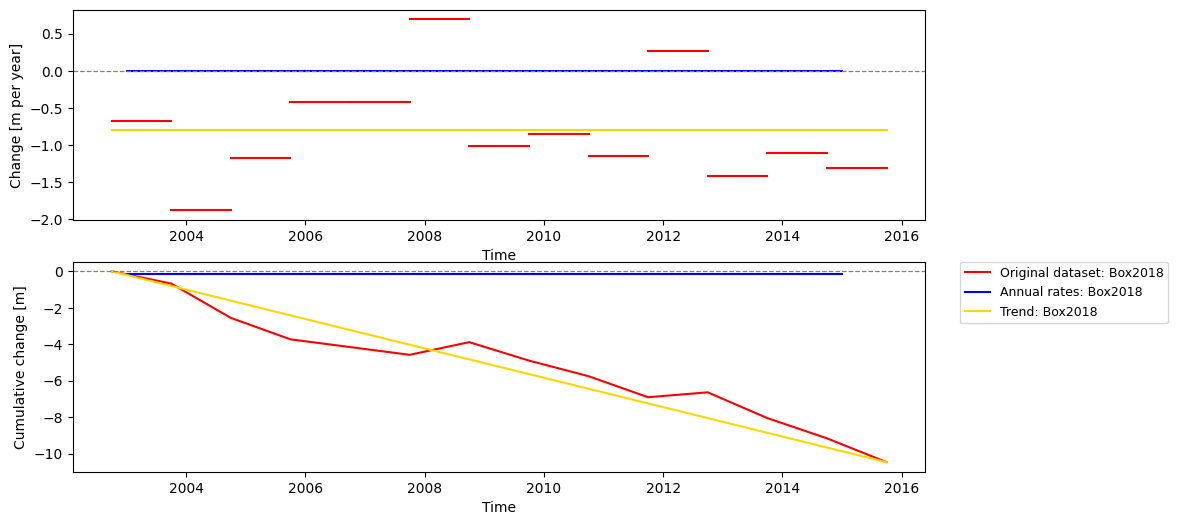

In [12]:
plot_errors=False # set to True if you want to plot error bars

_, axes = plt.subplots(2, 1, figsize=(11, 6))
colours = get_colours(3)

# plot non-cumulative timeseries
plot_non_cumulative_timeseries_on_axis(
    result_dataframe=dataset_in_mwe.data.as_dataframe(), ax=axes[0], colour=colours[0], plot_errors=plot_errors)
plot_non_cumulative_timeseries_on_axis(
    result_dataframe=dataset_annual.data.as_dataframe(), ax=axes[0], colour=colours[1], plot_errors=plot_errors)
plot_non_cumulative_timeseries_on_axis(
    result_dataframe=dataset_trend.data.as_dataframe(), ax=axes[0], colour=colours[2], plot_errors=plot_errors)

# plot cumulative timeseries
plot_cumulative_timeseries_on_axis(
    timeseries=dataset_in_mwe, ax=axes[1], colour=colours[0], plot_errors=plot_errors, linestyle="-",
    timeseries_for_vertical_adjustment=None, label="Original dataset: " + dataset_in_mwe.user_group)
plot_cumulative_timeseries_on_axis(
    timeseries=dataset_annual, ax=axes[1], colour=colours[1], plot_errors=plot_errors, linestyle="-",
    timeseries_for_vertical_adjustment=dataset_in_mwe, # vertically adjust to original dataset
    label="Annual rates: " + dataset_annual.user_group)
plot_cumulative_timeseries_on_axis(
    timeseries=dataset_trend, ax=axes[1], colour=colours[2], plot_errors=plot_errors, linestyle="-",
    timeseries_for_vertical_adjustment=dataset_in_mwe, # vertically adjust to original dataset
    label="Trend: " + dataset_trend.user_group)

add_labels_axlines_and_title(
    axes=axes, unit=catalogue_filtered_group.datasets[0].unit, legend_fontsize=9,
    title="")

#### Download dataset information PDF of dataset

Download the PDF submitted by the participants

In [13]:
# download PDF (by default it will be in the same directory as notebook is run unless target directory is specified)
submission_system_interface.download_dataset_information_file_to_disk(
    user_group=dataset.user_group, data_group=dataset.data_group, target_directory=".")